# Part 1 - Object Oriented Programming: Neuron Class Hierarchy

Task a: 

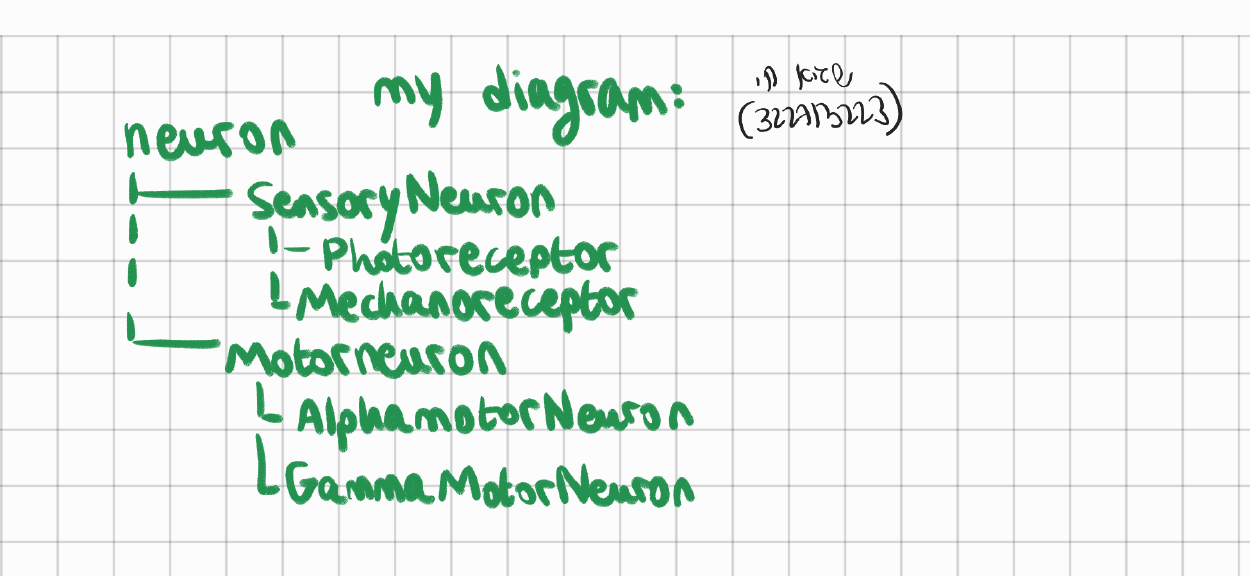

Task b:

In [8]:
class Neuron:
   def __init__(self, firing_rate=0):
       self.firing_rate = firing_rate
   
   def activate(self, stimulus):
       # calculates how much the neuron fires based on input
       pass

class SensoryNeuron(Neuron):
   def __init__(self, firing_rate=0, receptor_type=None):
       super().__init__(firing_rate)
       self.receptor_type = receptor_type
   
   def sense_stimulus(self, stimulus):
       # processes input based on what type of stimulus it can detect
       pass

class MotorNeuron(Neuron):
   def __init__(self, firing_rate=0, target_muscle=None):
       super().__init__(firing_rate)
       self.target_muscle = target_muscle
   
   def control_muscle(self):
       # controls a muscle based on how active the neuron is
       pass

class Photoreceptor(SensoryNeuron):
   def __init__(self, firing_rate=0):
       super().__init__(firing_rate, receptor_type="light")
   
   def sense_stimulus(self, light_intensity):
       # handles how the neuron responds to light
       pass
   
   def light_detection(self, light_intensity):
       # special way of detecting light
       pass

class Mechanoreceptor(SensoryNeuron):
   def __init__(self, firing_rate=0):
       super().__init__(firing_rate, receptor_type="pressure")
   
   def sense_stimulus(self, pressure):
       # handles how the neuron responds to pressure
       pass
   
   def pressure_detection(self, pressure):
       # special way of detecting pressure
       pass

class AlphaMotorNeuron(MotorNeuron):
   def __init__(self, firing_rate=0):
       super().__init__(firing_rate, target_muscle="skeletal muscle")
   
   def control_muscle(self):
       # controls skeletal muscles specifically
       pass
   
   def skeletal_muscle_control(self):
       # special way of controlling skeletal muscles
       pass

class GammaMotorNeuron(MotorNeuron):
   def __init__(self, firing_rate=0):
       super().__init__(firing_rate, target_muscle="muscle spindle")
   
   def control_muscle(self):
       # controls muscle spindles specifically
       pass
   
   def muscle_spindle_control(self):
       # special way of controlling muscle spindles
       pass

# Part 2 - Data Analysis with NumPy, Pandas, and Matplotlib

In [2]:
pip install numpy matplotlib pandas

Note: you may need to restart the kernel to use updated packages.


## Q1: Sinusoidal Signal Processing

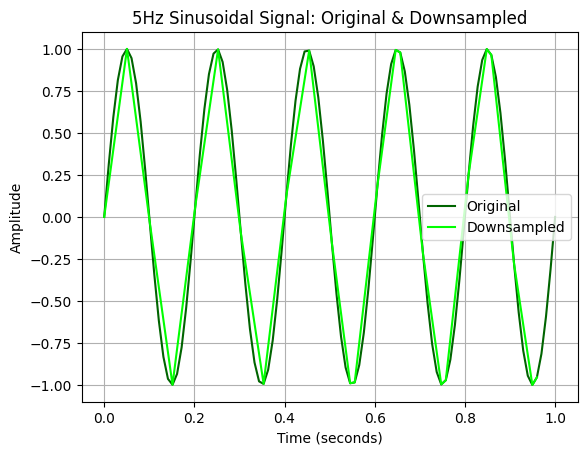

Signal reduced by 75.0%


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# function to find and keep the key points of the sinus function
def downsample_signal(signal, t):
    # list of min and max points
    important_points = []
    
    
    for i in range(1, len(signal)-1):
        # if its a maximum point
        if signal[i] > signal[i-1] and signal[i] > signal[i+1]:
            important_points.append(i)
        # if it's a minimum point
        if signal[i] < signal[i-1] and signal[i] < signal[i+1]:
            important_points.append(i)
    
    # take every 5th point
    regular_points = range(0, len(signal), 5)
    
    # uniting all of the points
    all_points = list(set(important_points + list(regular_points)))
    all_points.sort()
    
    return t[all_points], signal[all_points]

# creating original signal
t = np.linspace(0, 1, 100)
signal = np.sin(2 * np.pi * 5 * t)

# creating new signal
t_new, new_signal = downsample_signal(signal, t)

# Drawing a graph
plt.plot(t, signal, 'darkgreen', label='Original')
plt.plot(t_new, new_signal, 'lime', label='Downsampled')
plt.title('5Hz Sinusoidal Signal: Original & Downsampled')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

# How much smaller is it now?
reduction = (1 - len(new_signal)/len(signal)) * 100
print(f"Signal reduced by {reduction:.1f}%")

## Q2: Laptop Price Dataset Analysis

### Task 1: Import Data

In [2]:
import pandas as pd
df = pd.read_csv('laptop_price - dataset.csv')

### Task 2: Company Price Analysis

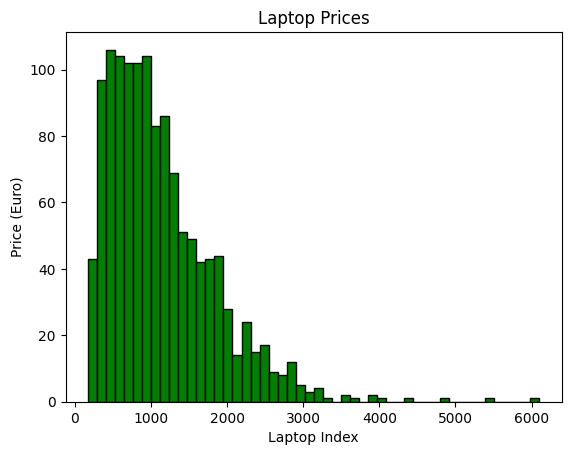

In [11]:
plt.hist(df['Price (Euro)'], bins=50, color="green", edgecolor="black") # go through all of the price column
plt.title('Laptop Prices') # The graph title
plt.xlabel('Laptop Index') # x axis title
plt.ylabel('Price (Euro)') # y axis title
plt.show() # show me the final product here

In [ ]:
# creating dictionary for averages
company_averages = {}

# calculating the averge price of each company
for company in set(df['Company']):
    prices = df[df['Company'] == company]['Price (Euro)']
    avg_price = sum(prices) / len(prices)
    company_averages[company] = avg_price

# finding out which company has thw highest prices
most_expensive = max(company_averages, key=company_averages.get)
max_avg_price = company_averages[most_expensive]

print(f"The company with the most expensive laptops on average is: {most_expensive}")
print(f"Their average laptop price is: {max_avg_price:.2f} euros")

# print all averages for comparison
print("\nAll company averages:")
for company, avg in company_averages.items():
    print(f"{company}: {avg:.2f} euros")

The company with the most expensive laptops on average is: Razer
Their average laptop price is: 3346.14 euros

All company averages:
Razer: 3346.14 euros
Fujitsu: 729.00 euros
Mediacom: 295.00 euros
Apple: 1564.20 euros
Lenovo: 1093.86 euros
Microsoft: 1612.31 euros
Google: 1677.67 euros
Samsung: 1413.44 euros
Huawei: 1424.00 euros
Dell: 1199.23 euros
Vero: 217.43 euros
LG: 2099.00 euros
Asus: 1123.83 euros
Toshiba: 1267.81 euros
Acer: 633.46 euros
Chuwi: 314.30 euros
MSI: 1728.91 euros
Xiaomi: 1133.46 euros
HP: 1080.31 euros


### Task 3: Operating Systems Analysis

In [ ]:
# show each unique operating system
print("All unique operating systems in the dataset:")
print(df['OpSys'].unique())

All unique operating systems in the dataset:
['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']


In [13]:
# show me the operating systems before my unification
print("Operating systems before unification:")
print(df['OpSys'].unique())

# creating a dictionary for the new names
os_mapping = {
    'Windows 10': 'Windows',
    'Windows 7': 'Windows', 
    'Windows 10 S': 'Windows',
    'Mac OS X': 'macOS',
    'macOS': 'macOS',
    'Linux': 'Linux',
    'No OS': 'No OS',
    'Android': 'Android',
    'Chrome OS': 'Chrome OS'
}

# creating a new column
df['OS_Clean'] = df['OpSys'].map(os_mapping)

# show me the operating systems after my unification
print("\nOperating systems after unification:")
print(df['OS_Clean'].unique())

# Display count of each OS
print("\nCount of each operating system:")
print(df['OS_Clean'].value_counts())

Operating systems before unification:
['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']

Operating systems after unification:
['macOS' 'No OS' 'Windows' 'Linux' 'Android' 'Chrome OS']

Count of each operating system:
OS_Clean
Windows      1101
No OS          66
Linux          58
Chrome OS      27
macOS          21
Android         2
Name: count, dtype: int64


### Task 4: Show all the distributions

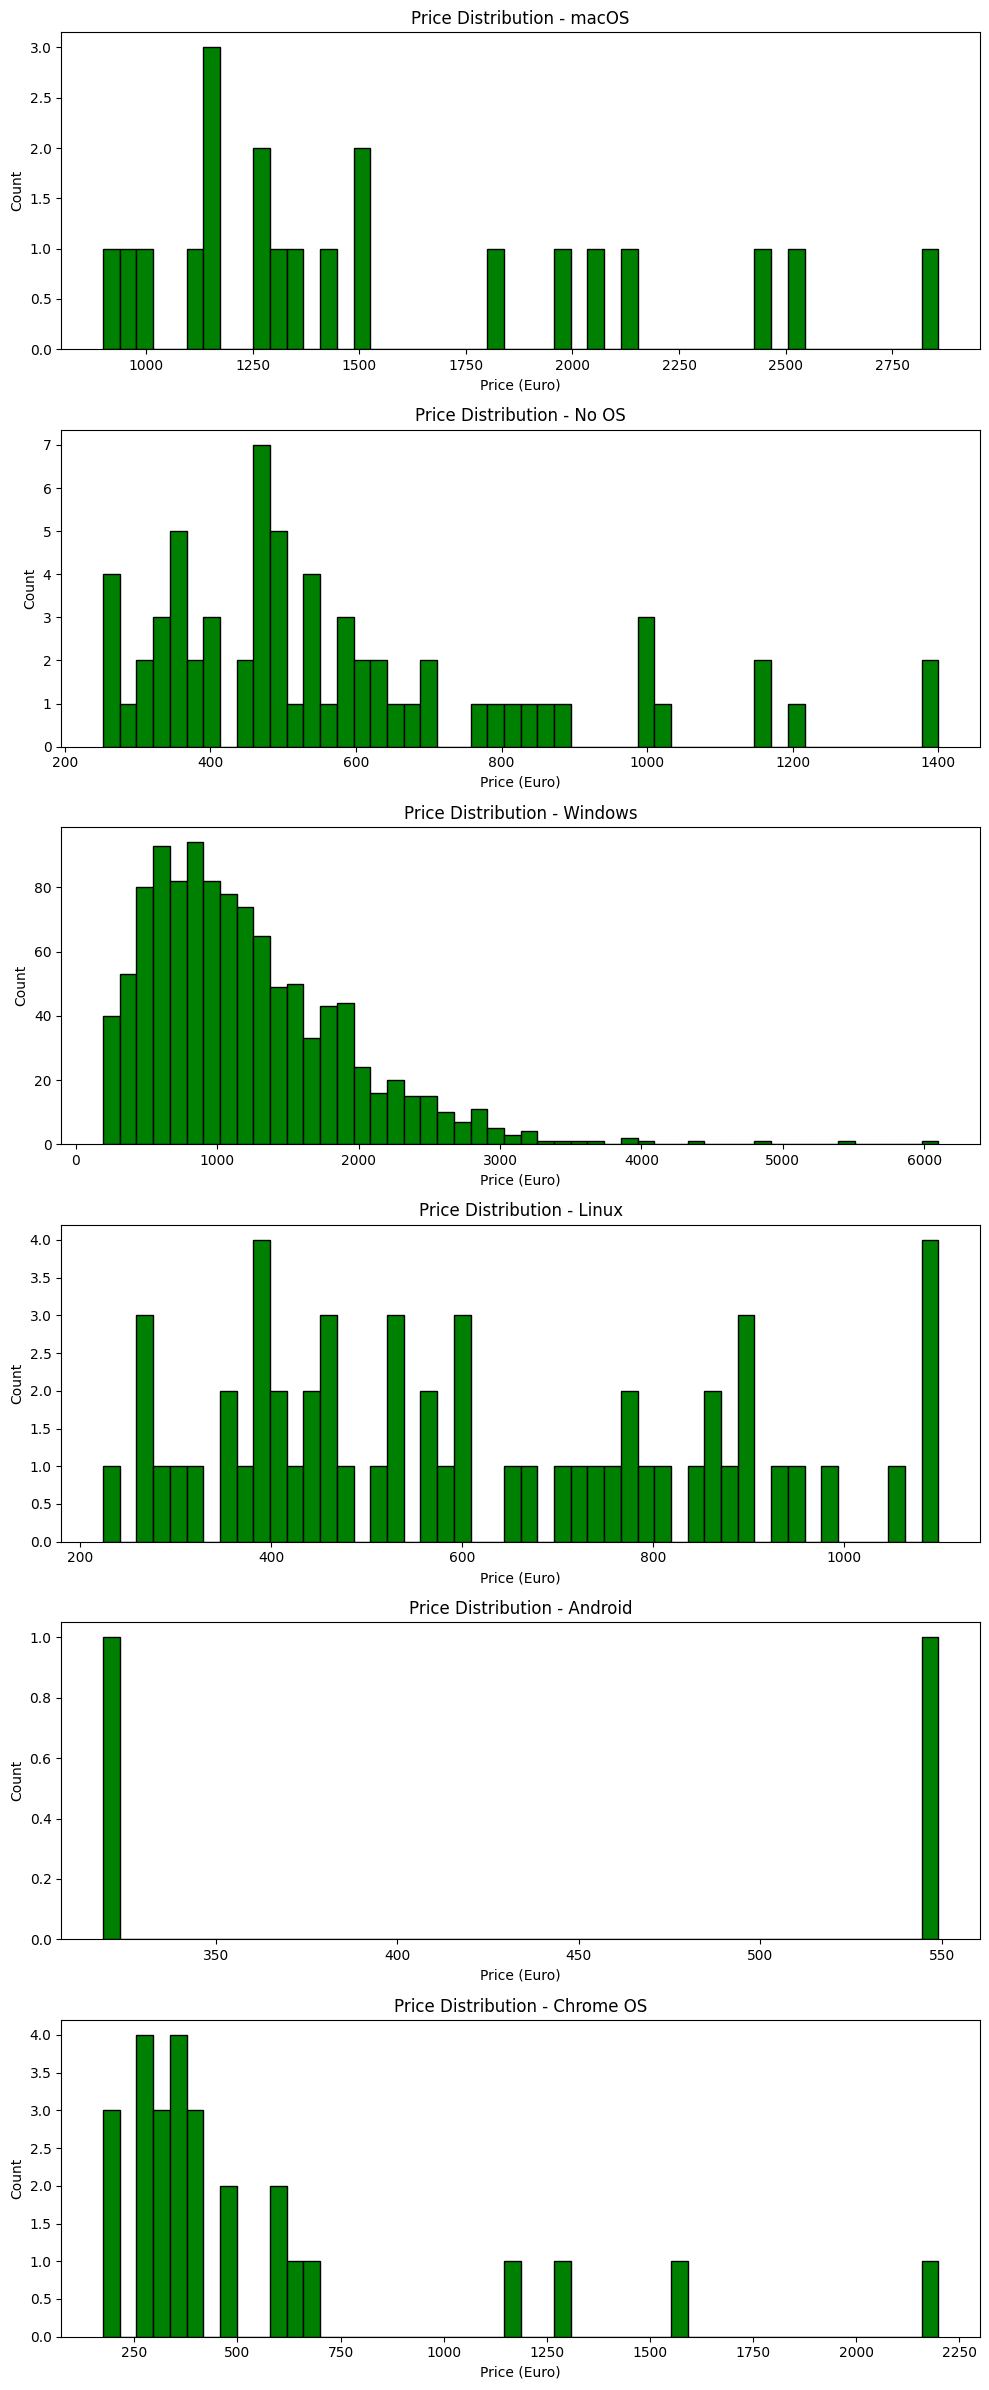

In [14]:
# creating different subplot of each opereating system
unique_os = df['OS_Clean'].unique()
fig, axes = plt.subplots(len(unique_os), 1, figsize=(10, 4*len(unique_os)))

for i, os in enumerate(unique_os):
    os_data = df[df['OS_Clean'] == os]['Price (Euro)']
    axes[i].hist(os_data, bins=50, color="green", edgecolor="black")
    axes[i].set_title(f'Price Distribution - {os}')
    axes[i].set_xlabel('Price (Euro)')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

what I've noticed:
- macOS shows higher average prices
- Windows shows the widest price range

### Task 5: RAM vs Price Analysis

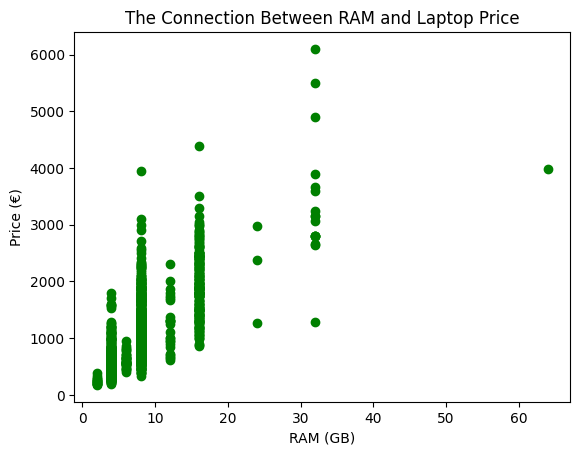

Correlation between RAM and Price: 0.74


In [4]:
plt.scatter(df['RAM (GB)'], df['Price (Euro)'], color='green') #creating a sactter graph
plt.title('The Connection Between RAM and Laptop Price')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (€)')
plt.show()

correlation = df['RAM (GB)'].corr(df['Price (Euro)']) # calculating correlation
print(f"Correlation between RAM and Price: {correlation:.2f}")

what I've noticed:
- Positive correlation (0.74)
- Higher RAM generally indicates higher prices

### Task 6: Storage Type Analysis

In [ ]:
def get_storage_type(memory_str):
    if 'SSD' in memory_str:
        return 'SSD'
    elif 'HDD' in memory_str:
        return 'HDD'
    elif 'Flash Storage' in memory_str:
        return 'Flash Storage'
    return 'Other'

df['Storage_Type'] = df['Memory'].apply(get_storage_type)

# Show counts of each storage type
print("\nCount of each storage type:")
print(df['Storage_Type'].value_counts())

# checking if everything works fine
print(df[['Memory', 'Storage_Type']].head())


Count of each storage type:
Storage_Type
SSD              837
HDD              360
Flash Storage     70
Other              8
Name: count, dtype: int64
                Memory   Storage_Type
0            128GB SSD            SSD
1  128GB Flash Storage  Flash Storage
2            256GB SSD            SSD
3            512GB SSD            SSD
4            256GB SSD            SSD


what I've noticed: 
- SSD is by far the most common (837 laptops)
- HDD second most common (360 laptops)
- Flash Storage in third place (70 laptops)
- Small number of other storage types (8 laptops)

### bonus question number 1: "Are computers with i7 processors significantly more expensive than computers with i5?"

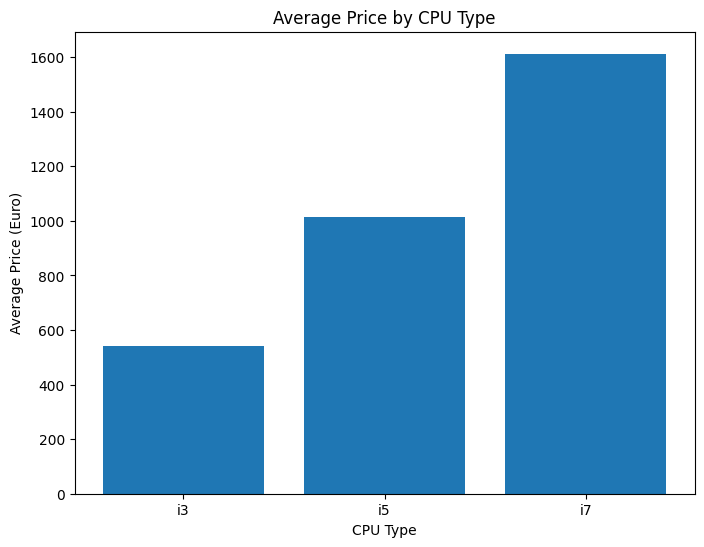

Average price for i3: 542.86 euros
Average price for i5: 1015.02 euros
Average price for i7: 1612.28 euros


In [ ]:
# calculating the average price of laptops with each processor:
i3_prices = df[df['CPU_Type'] == 'i3']['Price (Euro)'].mean()
i5_prices = df[df['CPU_Type'] == 'i5']['Price (Euro)'].mean()
i7_prices = df[df['CPU_Type'] == 'i7']['Price (Euro)'].mean()

# I chose to design a bar graph
plt.figure(figsize=(8, 6))
plt.bar(['i3', 'i5', 'i7'], [i3_prices, i5_prices, i7_prices])
plt.title('Average Price by CPU Type')
plt.xlabel('CPU Type')
plt.ylabel('Average Price (Euro)')
plt.show()

# print average prices of each processor
print(f"Average price for i3: {i3_prices:.2f} euros")
print(f"Average price for i5: {i5_prices:.2f} euros")
print(f"Average price for i7: {i7_prices:.2f} euros")

### bonus question number 2: ""Are lighter computers more expensive?"

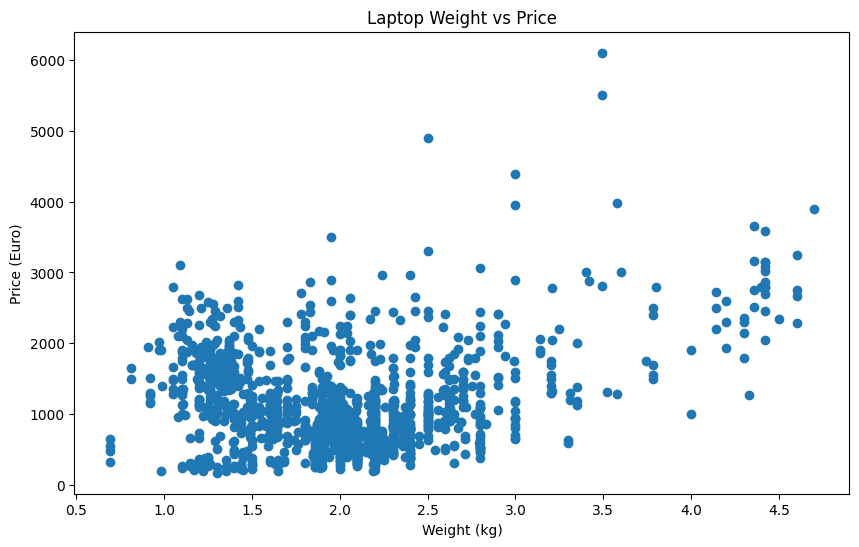

Correlation between weight and price: 0.21


In [ ]:
# I chose to create a scatter graph
plt.figure(figsize=(10, 6))
plt.scatter(df['Weight (kg)'], df['Price (Euro)'])
plt.title('Laptop Weight vs Price')
plt.xlabel('Weight (kg)')
plt.ylabel('Price (Euro)')
plt.show()

# calculating correlation
correlation = df['Weight (kg)'].corr(df['Price (Euro)'])
print(f"Correlation between weight and price: {correlation:.2f}")

# My bonus questions analysis

## Question 1: 
I decided to do an analysis of the relationship between CPU type (i3, i5, i7) and laptop prices:
- I can see that the price increase with CPU tier progression (i3 -> i5 -> i7)
- i7 processors show the highest average prices
- Now I can tell that CPU type is a significant factor in determining laptop price

## Question 2: 
Analysis of the correlation between laptop weight and price:
- I can tel that there's just a slightly positive correlation
- I see just a slight price increase with weight increase
- Many expensive laptops are actually lightweight
- Overall the relationship is not as straightforward as I expected